<h2>Лабораторная работа №4</h2>
<h1 style="font-size: 30px; font-family: Georgia, serif;">Работа с классификацией данных при помощи skikit-learn. Построение модели машинного обучения методом k-средних. </h1>

<h2>1. Оптическое распознавание набора данных рукописных цифр </h2>

<h5> 1. Изучение данных </h5>

Импортирование библиотек и загрузка данных

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_digits
digits_dataset = load_digits()

Создание  объекта DataFrame и вывод первых строк

In [145]:
digits_data = pd.DataFrame(digits_dataset.data, columns=digits_dataset.feature_names)
digits_data.head(15)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


Подсчет уникальных значений в каждом столбце DataFrame

In [146]:
digits_data.value_counts()

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  pixel_1_2  pixel_1_3  pixel_1_4  pixel_1_5  pixel_1_6  pixel_1_7  pixel_2_0  pixel_2_1  pixel_2_2  pixel_2_3  pixel_2_4  pixel_2_5  pixel_2_6  pixel_2_7  pixel_3_0  pixel_3_1  pixel_3_2  pixel_3_3  pixel_3_4  pixel_3_5  pixel_3_6  pixel_3_7  pixel_4_0  pixel_4_1  pixel_4_2  pixel_4_3  pixel_4_4  pixel_4_5  pixel_4_6  pixel_4_7  pixel_5_0  pixel_5_1  pixel_5_2  pixel_5_3  pixel_5_4  pixel_5_5  pixel_5_6  pixel_5_7  pixel_6_0  pixel_6_1  pixel_6_2  pixel_6_3  pixel_6_4  pixel_6_5  pixel_6_6  pixel_6_7  pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  pixel_7_7
0.0        0.0        0.0        0.0        3.0        14.0       3.0        0.0        0.0        0.0        0.0        1.0        14.0       16.0       5.0        0.0        0.0        1.0        9.0        15.0       16.0       16.0       4.0        0.0        0.0        4.0        12.0       

Вывод ключей в digits_dataset

In [147]:
print("Keys digits_dataset: \n{}".format(digits_dataset.keys()))

Keys digits_dataset: 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


Вывод описания digits_dataset

In [148]:
print(digits_dataset['DESCR']+"\n...")

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Имена классов в digits_dataset

In [149]:
print("Name of the classes: {}".format(digits_dataset['target_names']))

Name of the classes: [0 1 2 3 4 5 6 7 8 9]


Вывод типа объекта

In [150]:
print("Type of the data array: {}".format(type(digits_dataset['data'])))
# особенности

Type of the data array: <class 'numpy.ndarray'>


Вывод формы матрицы пикселей

In [151]:
print("The shape of the data array: {}".format(digits_dataset['data'].shape))

The shape of the data array: (1797, 64)


Вывод целевых переменных для каждого изображения

In [152]:
print("Answers:\n{}".format(digits_dataset['target']))

Answers:
[0 1 2 ... 8 9 8]


Вывод строк матрицы пикселей

In [153]:
print("The rows of the data array: \n{}".format(digits_dataset['data']))

The rows of the data array: 
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


Вывод формы массива целевых переменных

In [154]:
print("Type of the target array: {}".format(digits_dataset['target'].shape))

Type of the target array: (1797,)


<h5> 2. Разделите данные на обучающий и тестовые наборы </h5>

Разделение данных на обучающий и тестовый наборы

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits_dataset['data'], digits_dataset['target'], test_size=0.2, random_state=0)

Вывод количества обучающих примеров и признаков

In [156]:
print("The shape of X_train: {}".format(X_train.shape))
print("The shape of y_train: {}".format(y_train.shape))

The shape of X_train: (1437, 64)
The shape of y_train: (1437,)


Вывод формы тестовых матрицы признаков и массива целевых переменных

In [157]:
print("The shape of X_test {}".format(X_test.shape))
print("The shape of y_test {}".format(y_test.shape))

The shape of X_test (360, 64)
The shape of y_test (360,)


<h5> 3. Исследуйте данные с помощью визуализации. Подберите нужные параметры графиков </h5>

Отображения изображения 8x8 пикселей для конкретной рукописной цифры

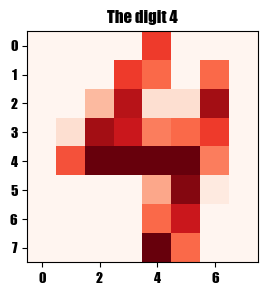

In [158]:
mpl.rcParams['font.family']='fantasy'
image_data = X_train[5]
image_matrix = image_data.reshape(8, 8)

plt.figure(figsize=(3,3)) 
plt.imshow(image_matrix, cmap='Reds', interpolation='nearest')
plt.title(f"The digit {y_train[5]}")
plt.show()

Визуализация того, какие значения пикселей наиболее часто встречаются в данных.

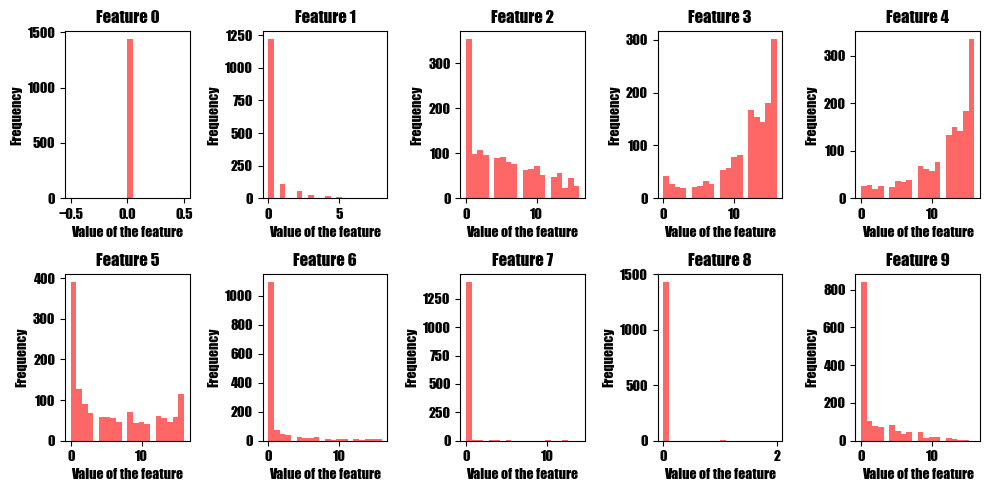

In [159]:
mpl.rcParams['font.family']='fantasy'
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.hist(X_train[:, i], bins=20, color='red', alpha=0.6)
    plt.title(f"Feature {i}")   
    plt.xlabel("Value of the feature")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Подсчитываем уникальные значения в каждом столбце

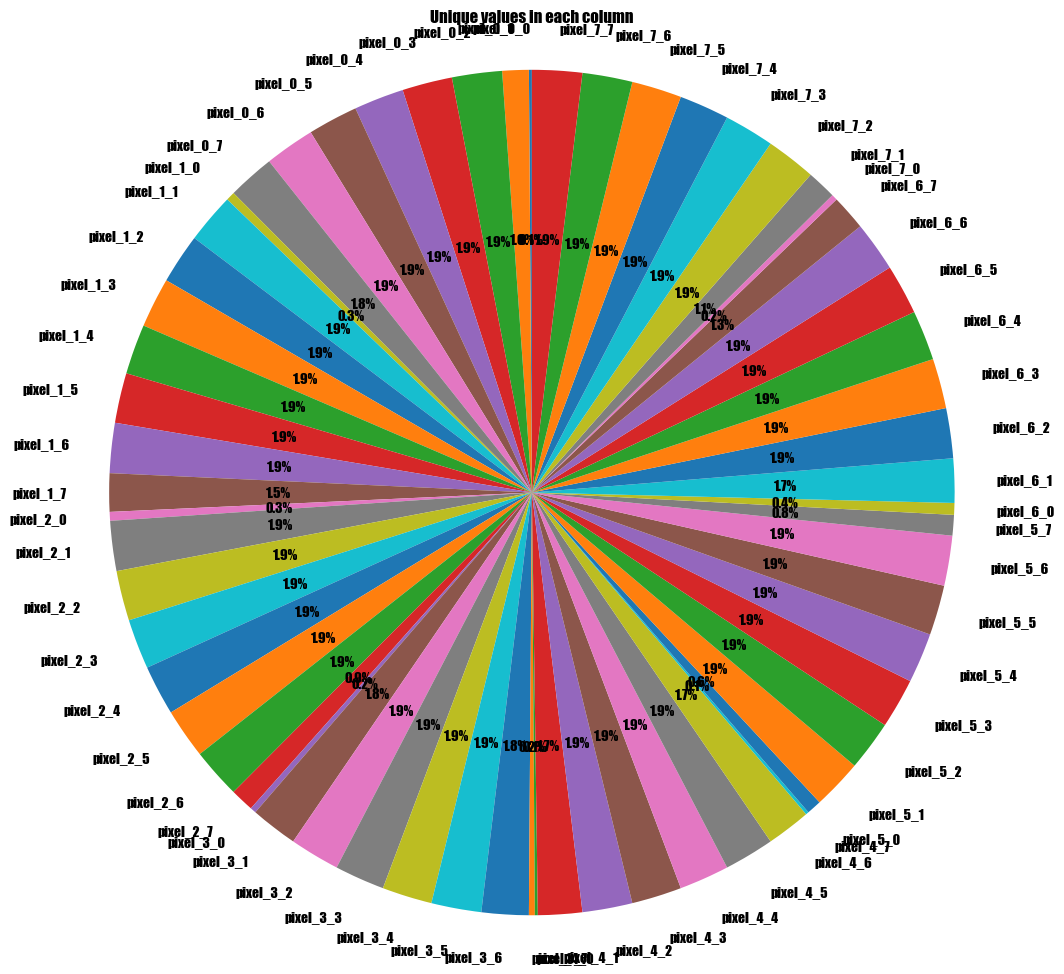

In [160]:
unique_val= digits_data.nunique()

labels = unique_val.index
values = unique_val.values

fig, ax = plt.subplots(figsize=(12, 12))
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal') 

plt.title("Unique values in each column")
plt.show()

<h5> 4. Постройте модель по методу k-ближайших средних </h5>

In [161]:
from sklearn.neighbors import KNeighborsClassifier
knn1_1 = KNeighborsClassifier(n_neighbors=1)
knn1_1.fit(X_train,y_train)

knn1_2 = KNeighborsClassifier(n_neighbors=2)
knn1_2.fit(X_train,y_train)

knn1_3 = KNeighborsClassifier(n_neighbors=3)
knn1_3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

<h5> Протестируйте на произвольном наборе данных </h5>

In [162]:
X_new = np.array([[5, 3, 1, 7, 3, 2, 1, 0, 3, 1, 9, 0, 4,5, 3, 1, 7, 3, 2, 1, 0, 3, 1, 2, 0, 4,5, 3, 1, 7, 3, 2, 1, 0, 3, 1, 2, 0, 4,5, 3, 1, 7, 3, 2, 1, 0, 3, 1, 2, 16, 4,5, 3, 1, 7, 3, 2, 1, 0, 3, 1, 2, 0]])

print("Shape of the X_new array {}".format(X_new.shape))

Shape of the X_new array (1, 64)


<h5> 5. Получите прогноз модели </h5>

In [163]:
prediction = knn1_1.predict(X_new)
prediction2 = knn1_2.predict(X_new)
prediction3 = knn1_3.predict(X_new)
print("Target class forecast1: {}".format(prediction))
print("Target class forecast2: {}".format(prediction2))
print("Target class forecast3: {}".format(prediction3))

Target class forecast1: [0]
Target class forecast2: [0]
Target class forecast3: [0]


<h5> 6. Оцените качество модели </h5>

In [164]:
y_pred = knn1_2.predict(X_test)
print("Prediction for test set: \n{}".format(y_pred))

Prediction for test set: 
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 3 4 8 7 0 6 1 5 3 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 1 9 3 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 2 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 5 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8]


In [165]:
print("Correctness on the arbitrary set: {:.3f}".format(np.mean(prediction == y_test)))
print("Correctness on the test set: {:.3f}".format(np.mean(y_pred == y_test)))

Correctness on the arbitrary set: 0.075
Correctness on the test set: 0.981


In [166]:
print("Correctness on the train set with k = 1: {:.3f}".format(knn1_1.score(X_train,y_train)))
print("Correctness on the train set with k = 2: {:.3f}".format(knn1_2.score(X_train,y_train)))
print("Correctness on the train set with k = 3: {:.3f}".format(knn1_3.score(X_train,y_train)))
print("**********************************************")
print("Correctness on the test set with k = 1: {:.3f}".format(knn1_1.score(X_test,y_test)))
print("Correctness on the test set with k = 2: {:.3f}".format(knn1_2.score(X_test,y_test)))
print("Correctness on the test set with k = 3: {:.3f}".format(knn1_3.score(X_test,y_test)))

Correctness on the train set with k = 1: 1.000
Correctness on the train set with k = 2: 0.990
Correctness on the train set with k = 3: 0.991
**********************************************
Correctness on the test set with k = 1: 0.989
Correctness on the test set with k = 2: 0.981
Correctness on the test set with k = 3: 0.983


<h5>Вывод</h5>

Я провела исследования по набору данных "Оптическое распознавание набора данных рукописных цифр".

При анализе данных были выполнены шаги, как загрузка данных, работа с разными библиотеки для вывода данных и визуализации, раздление данных, обучение модели и оценка прогнозирования. 

В задаче классификации возможные числа - это от 0 до 9.
Работа была с изображениями рукописных цифр, если точнее сказать с матрицами размером 8 на 8, где каждый элемент(ячейка, клетка) 
заполнен числом от 0 до 16. Элемент не может быть пустым. В наборе всего было 1797 изображений.

Чтобы лучше понять анализ данных, построила гистограмму и круговую диаграммы, которые построены по разным критериям. 

В ходе работы набор данных был разделен на обучающий набор - 80% от всего, тестовый набор - остальные 20%
для последующего обучения и оценки моделей обучения. То есть, насколько хорошо и правильно будет проведена классификация.

Для задачи классификации был выбран алгоритм k-ближайших соседей. Тест прошел с разным количеством соседей, от 1 до 3. Это помогло узнать, насколько влияет количество соседей на результаты прогноза.
 
Модель была обучена на обучающем наборе данных, а также для сравнения результатов, на тестовом наборе данных. Протестировала модель также на произвольном наборе данных(данные были написаны рандомными цифрами  от 0...16).

Прошла проверка сравнения произвольных данных с тестовым данными тестового набора. Правильность в этом случае составила меньше 10%. 
Далее была проведена оценка точности классификации на тестовом наборе, где правильность модели составляет в среднем 0.98(98%). Аналогичное проведение прогнозов составило 0.99(99%) в обучающем наборе. 

Исследование набора данных "digits" позволило лучше понять структуру данных и важность различных пикселей для задачи распознавания рукописных цифр. Полученные результаты позволяют сделать вывод о возможности использования обучения  моделей  для успешного распознавания и классификации рукописных цифр. В дальнейшем мы можем применять это для решения задач оптического распознавания.

<h2>2. Набор данных по распознаванию вин </h2>
<h5> 1. Изучение данных </h5>

Импортирование и загрузка данных

In [167]:
from sklearn.datasets import load_wine
wine_dataset = load_wine()

Создание  объекта DataFrame и вывод первых строк

In [168]:
wine_data = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
wine_data.head(20)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


Подсчет уникальных значений в каждом столбце DataFrame

In [169]:
wine_data.value_counts()

alcohol  malic_acid  ash   alcalinity_of_ash  magnesium  total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  hue   od280/od315_of_diluted_wines  proline
11.03    1.51        2.20  21.5               85.0       2.46           2.17        0.52                  2.01             1.90             1.71  2.87                          407.0      1
13.68    1.83        2.36  17.2               104.0      2.42           2.69        0.42                  1.97             3.84             1.23  2.87                          990.0      1
13.40    3.91        2.48  23.0               102.0      1.80           0.75        0.43                  1.41             7.30             0.70  1.56                          750.0      1
         4.60        2.86  25.0               112.0      1.98           0.96        0.27                  1.11             8.50             0.67  1.92                          630.0      1
13.41    3.84        2.12  18.8               90.0       2.4

Вывод ключей

In [170]:
print("Keys wine_dataset: \n{}".format(wine_dataset.keys()))

Keys wine_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


Вывод описания 

In [171]:
print(wine_dataset['DESCR']+"\n...")

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

Имена классов 

In [172]:
print("Name of the classes: {}".format(wine_dataset['target_names']))

Name of the classes: ['class_0' 'class_1' 'class_2']


Информация об атрибутах

In [173]:
print("Name of the signs: \n{}".format(wine_dataset['feature_names']))

Name of the signs: 
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Вывод типа объекта

In [174]:
print("Type of the data array: {}".format(type(wine_dataset['data'])))

Type of the data array: <class 'numpy.ndarray'>


Вывод формы

In [175]:
print("The shape of the data array: {}".format(wine_dataset['data'].shape))

The shape of the data array: (178, 13)


Вывод метки 

In [176]:
print("Answers:\n{}".format(wine_dataset['target']))

Answers:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Вывод 10 строк 

In [177]:
print("The 10 rows of the data array: \n{}".format(wine_dataset['data']))

The 10 rows of the data array: 
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


Вывод формы массива

In [178]:
print("Type of the target array: {}".format(wine_dataset['target'].shape))

Type of the target array: (178,)


<h5> 2. Разделите данные на обучающий и тестовые наборы </h5>

Разделение данных на обучающий и тестовый наборы

In [179]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(wine_dataset['data'], wine_dataset['target'], test_size=0.25, random_state=0)

Вывод количества обучающих примеров и признаков

In [180]:
print("The shape of X_train: {}".format(X_train2.shape))
print("The shape of y_train: {}".format(y_train2.shape))
print("The shape of X_test {}".format(X_test2.shape))
print("The shape of y_test {}".format(y_test2.shape))

The shape of X_train: (133, 13)
The shape of y_train: (133,)
The shape of X_test (45, 13)
The shape of y_test (45,)


<h5> 3. Исследуйте данные с помощью визуализации. Подберите нужные параметры графиков </h5>

Распределение классов в наборе данных

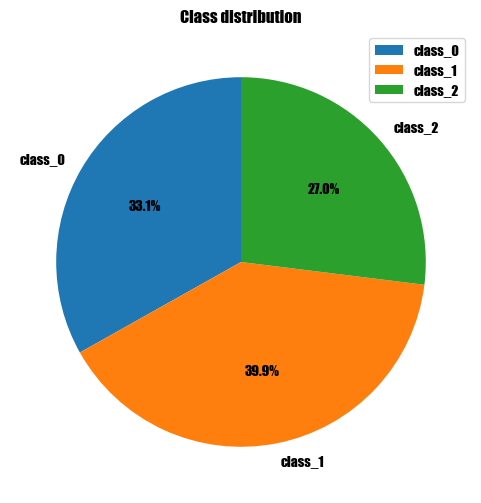

In [181]:
class_d = [59, 71, 48]
class_labels = ['class_0', 'class_1', 'class_2']

plt.figure(figsize=(6, 6))
plt.pie(class_d, labels=class_labels, autopct='%1.1f%%', startangle=90)
plt.title("Class distribution")

plt.legend()
plt.show()

Распределение определенного атрибута для каждого класса

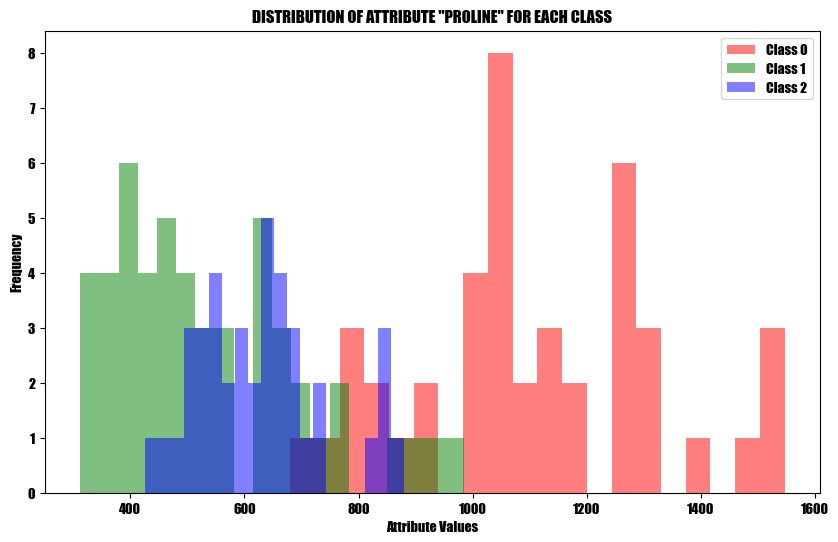

In [182]:
attribute_index = 12

class_0 = X_train2[y_train2 == 0, attribute_index]
class_1 = X_train2[y_train2 == 1, attribute_index]
class_2 = X_train2[y_train2 == 2, attribute_index]

plt.figure(figsize=(10, 6))

plt.hist(class_0, bins=20, alpha=0.5, label='Class 0', color='r')
plt.hist(class_1, bins=20, alpha=0.5, label='Class 1', color='g')
plt.hist(class_2, bins=20, alpha=0.5, label='Class 2', color='b')

plt.xlabel('Attribute Values')
plt.ylabel('Frequency')
plt.title('Distribution of attribute "{}" for Each Class'.format(wine_dataset.feature_names[attribute_index]).upper())
plt.legend()
plt.show()

Визуализация диапозонов значений

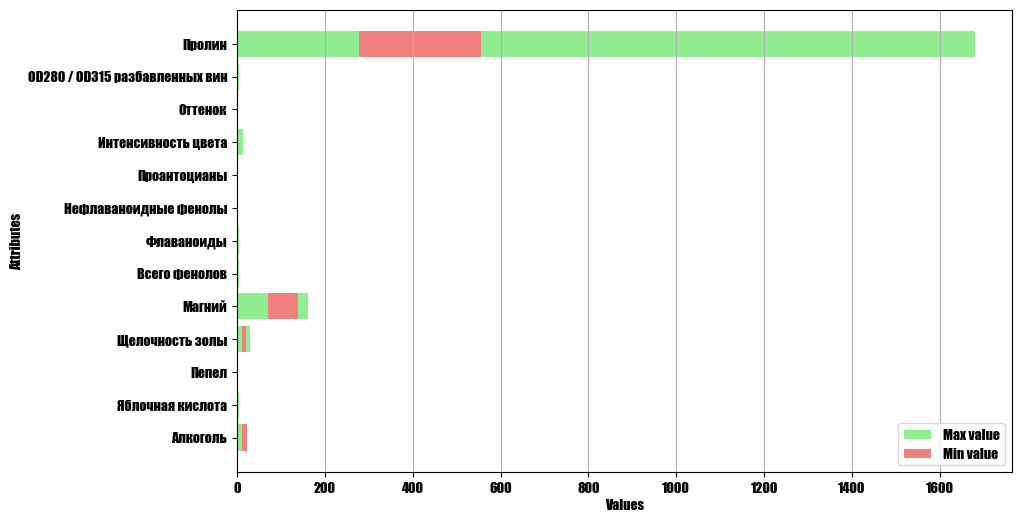

In [183]:
attributes = [
    ("Алкоголь", 11.0, 14.8, 13.0, 0.8),
    ("Яблочная кислота", 0.74, 5.80, 2.34, 1.12),
    ("Пепел", 1.36, 3.23, 2.36, 0.27),
    ("Щелочность золы", 10.6, 30.0, 19.5, 3.3),
    ("Магний", 70.0, 162.0, 99.7, 14.3),
    ("Всего фенолов", 0.98, 3.88, 2.29, 0.63),
    ("Флаваноиды", 0.34, 5.08, 2.03, 1.00),
    ("Нефлаваноидные фенолы", 0.13, 0.66, 0.36, 0.12),
    ("Проантоцианы", 0.41, 3.58, 1.59, 0.57),
    ("Интенсивность цвета", 1.3, 13.0, 5.1, 2.3),
    ("Оттенок", 0.48, 1.71, 0.96, 0.23),
    ("OD280 / OD315 разбавленных вин", 1.27, 4.00, 2.61, 0.71),
    ("Пролин", 278, 1680, 746, 315)
]

attribute_names = [attribute[0] for attribute in attributes]
min_values = [attribute[1] for attribute in attributes]
max_values = [attribute[2] for attribute in attributes]

plt.figure(figsize=(10, 6))
plt.barh(attribute_names, max_values, color='lightgreen', label='Max value')
plt.barh(attribute_names, min_values, color='lightcoral', label='Min value',left=min_values)
plt.xlabel('Values')
plt.ylabel('Attributes')
plt.legend()
plt.grid(axis='x')

plt.show()

Визуализации минимальных значений для каждого атрибута

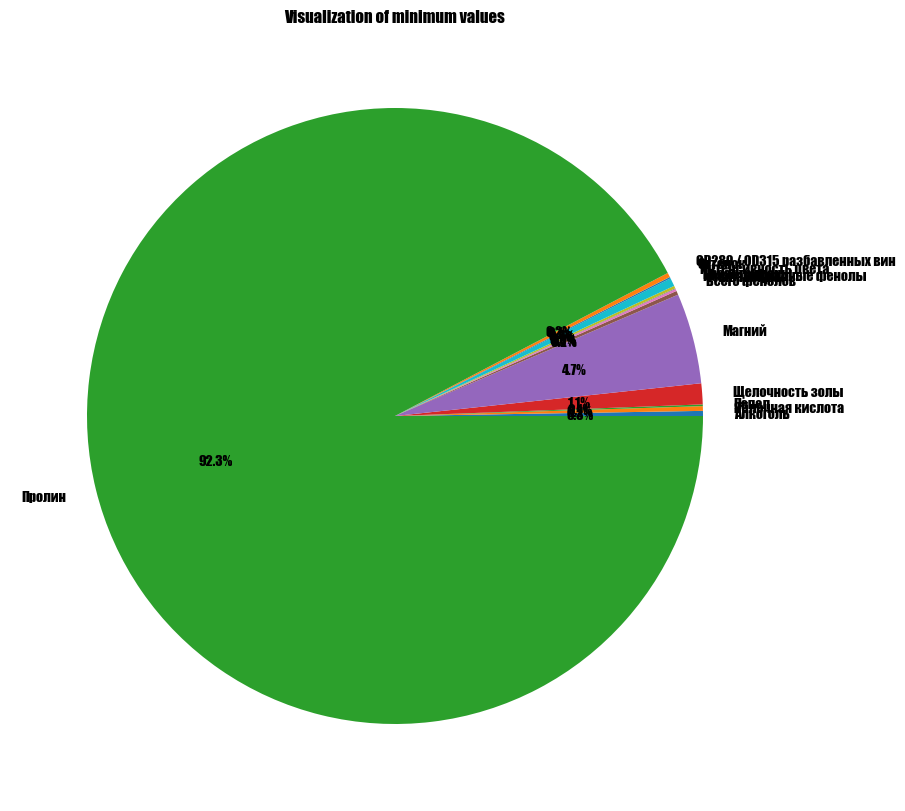

In [184]:
attributes = ["Алкоголь", "Яблочная кислота", "Пепел", "Щелочность золы",
              "Магний", "Всего фенолов", "Флаваноиды", "Нефлаваноидные фенолы",
              "Проантоцианы", "Интенсивность цвета", "Оттенок",
              "OD280 / OD315 разбавленных вин", "Пролин"]
min_values = [0.8, 0.74, 0.27, 3.3, 14.3, 0.63, 0.34, 0.12, 0.41, 1.3, 0.23, 0.71, 278]

plt.figure(figsize=(10, 10))
plt.pie(min_values, labels=attributes, autopct='%1.1f%%')

plt.title('Visualization of minimum values')
plt.show()
# из-за того, что у многих маленькие значения, график надписи немного непонятные

|<h5> 4. Постройте модель по методу k-ближайших средних </h5>

In [185]:
from sklearn.neighbors import KNeighborsClassifier

knn2_1 = KNeighborsClassifier(n_neighbors=1)
knn2_2 = KNeighborsClassifier(n_neighbors=4)

knn2_1.fit(X_train2,y_train2)
knn2_2.fit(X_train2,y_train2)

KNeighborsClassifier(n_neighbors=4)

Протестируйте на произвольном наборе данных

In [186]:
X_2 = np.array([[13.0, 12.0, 1.0, 12.0, 100.0, 1.0, 0.5, 0.1, 0.3, 3.0, 1.0, 2.0, 1500.0]])

print("Shape of the X new array: {}".format(X_2.shape))

Shape of the X new array: (1, 13)


<h5> 5. Получите прогноз модели </h5>

In [187]:
predic = knn2_1.predict(X_2)
predic1 = knn2_2.predict(X_2)
print("Target class forecast: {}".format(predic1))

Target class forecast: [0]


<h5> 6. Оцените качество модели </h5>

In [188]:
y_pred2 = knn2_1.predict(X_test2)
print("Prediction for test set: \n{}".format(y_pred2))

Prediction for test set: 
[0 1 1 0 1 1 0 2 1 1 0 1 0 2 1 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 2 0 0 0 2
 1 1 1 2 0 1 1 1]


In [189]:
print("Correctness on the test set: {:.3f}".format(np.mean(y_pred2 == y_test2)))
print("------------------------------------")
print("Correctness on the train set: {:.3f}".format(knn2_1.score(X_train2, y_train2)))
print("Correctness on the train set: {:.3f}".format(knn2_2.score(X_train2, y_train2)))
print("------------------------------------")
print("Correctness on the test set: {:.3f}".format(knn2_1.score(X_test2, y_test2)))
print("Correctness on the test set: {:.3f}".format(knn2_2.score(X_test2, y_test2)))

Correctness on the test set: 0.756
------------------------------------
Correctness on the train set: 1.000
Correctness on the train set: 0.820
------------------------------------
Correctness on the test set: 0.756
Correctness on the test set: 0.778


<h5>Вывод</h5>

В рамках проведенного исследования набора данных по распознаванию вин были выполнены важные шаги и проведен анализ, который позволил сделать следующие выводы:

Данный набор данных представляет собой сбор информации о химических характеристиках разных видов вин с общим количеством экземпляров в 178. Также 13 числовых атрибутов. Эти данные могут быть важными для идентификации и классификации вин на основе их химических особенностей.

Основные этапы анализа данных включали в себя загрузку, визуализацию и подготовку данных для обучения моделей машинного обучения. Были построены гистограммы, круговые диаграммы и другие визуализации, которые позволили лучше понять распределение характеристик вин. 

Модель была обучена, а затем протестирована. Для обучения модели классификации был выбран алгоритм k-ближайших соседей, и было проведено тестирование модели с разным количеством соседей. Это позволило определить оптимальное количество соседей для данной задачи. При большом количестве соседей в тестовом наборе было большая точность прогноза, а в обучающем наоборот.

Кроме того, была проведена проверка модели на произвольном наборе данных, где модель смогла успешно справиться с распознаванием вин. Это подтверждает гибкость и применимость модели для различных сценариев.

В ходе работы набор данных был разделен на обучающий набор - 75% от всего, тестовый набор - остальные 25%
для последующего обучения и оценки моделей обучения. То есть, насколько хорошо и правильно будет проведена классификация.

Прошла проверка сравнения произвольных данных с тестовым данными тестового набора. Правильность в этом случае составила меньше 0.75. Что означает, 75% правильности классификации. Далее была проведена оценка точности классификации на тестовом наборе, где правильность модели составляет в среднем 0.76. Аналогичное проведение прогнозов составило 0.90 в обучающем наборе. 

В целом, исследование набора данных по распознаванию вин демонстрирует потенциал использования методов машинного обучения для точной классификации вин на основе их химических характеристик. Полученные результаты могут быть полезными для виноделов, и всех, кто интересуется миром вин и их классификацией.

<h2>3. Набор данных по раку груди висконсин (диагностический) </h2>
<h5> 1. Изучение данных </h5>

In [190]:
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()

In [191]:
cancer_data = pd.DataFrame(cancer_dataset.data, columns=cancer_dataset.feature_names)
cancer_data.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [192]:
cancer_data.value_counts()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  radius error  texture error  perimeter error  area error  smoothness error  compactness error  concavity error  concave points error  symmetry error  fractal dimension error  worst radius  worst texture  worst perimeter  worst area  worst smoothness  worst compactness  worst concavity  worst concave points  worst symmetry  worst fractal dimension
6.981        13.43         43.79           143.5      0.11700          0.07568           0.00000         0.00000              0.1930         0.07818                 0.2241        1.5080         1.553            9.833       0.010190          0.010840           0.00000          0.000000              0.02659         0.004100                 7.93          19.54          50.41            185.2       0.1584            0.12020            0.00000          0.00000               0.2932      

In [193]:
print("Keys cancer_dataset: \n{}".format(cancer_dataset.keys()))

Keys cancer_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [194]:
print(cancer_dataset['DESCR'] + "\n...")

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [195]:
print("Name of the classes: {}".format(cancer_dataset['target_names']))

Name of the classes: ['malignant' 'benign']


In [196]:
print("Name of the signs: \n{}".format(cancer_dataset['feature_names']))

Name of the signs: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [197]:
print("Type of the data array: {}".format(type(cancer_dataset['data'])))

Type of the data array: <class 'numpy.ndarray'>


In [198]:
print("The shape of the data array: {}".format(cancer_dataset['data'].shape))

The shape of the data array: (569, 30)


In [199]:
print("Answers:\n{}".format(cancer_dataset['target']))

Answers:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1

In [200]:
print("The 10 rows of the data array: \n{}".format(cancer_dataset['data']))

print("Type of the target array: {}".format(cancer_dataset['target'].shape))

The 10 rows of the data array: 
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
Type of the target array: (569,)


<h5> 2. Разделите данные на обучающий и тестовые наборы </h5>

In [201]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(cancer_dataset['data'], cancer_dataset['target'], test_size=0.3,
                                                        random_state=0)
print("The shape of X_train: {}".format(X_train3.shape))
print("The shape of y_train: {}".format(y_train3.shape))
print("The shape of X_test {}".format(X_test3.shape))
print("The shape of y_test {}".format(y_test3.shape))


The shape of X_train: (398, 30)
The shape of y_train: (398,)
The shape of X_test (171, 30)
The shape of y_test (171,)


<h5> 3. Исследуйте данные с помощью визуализации.Подберите нужные параметры графиков </h5>

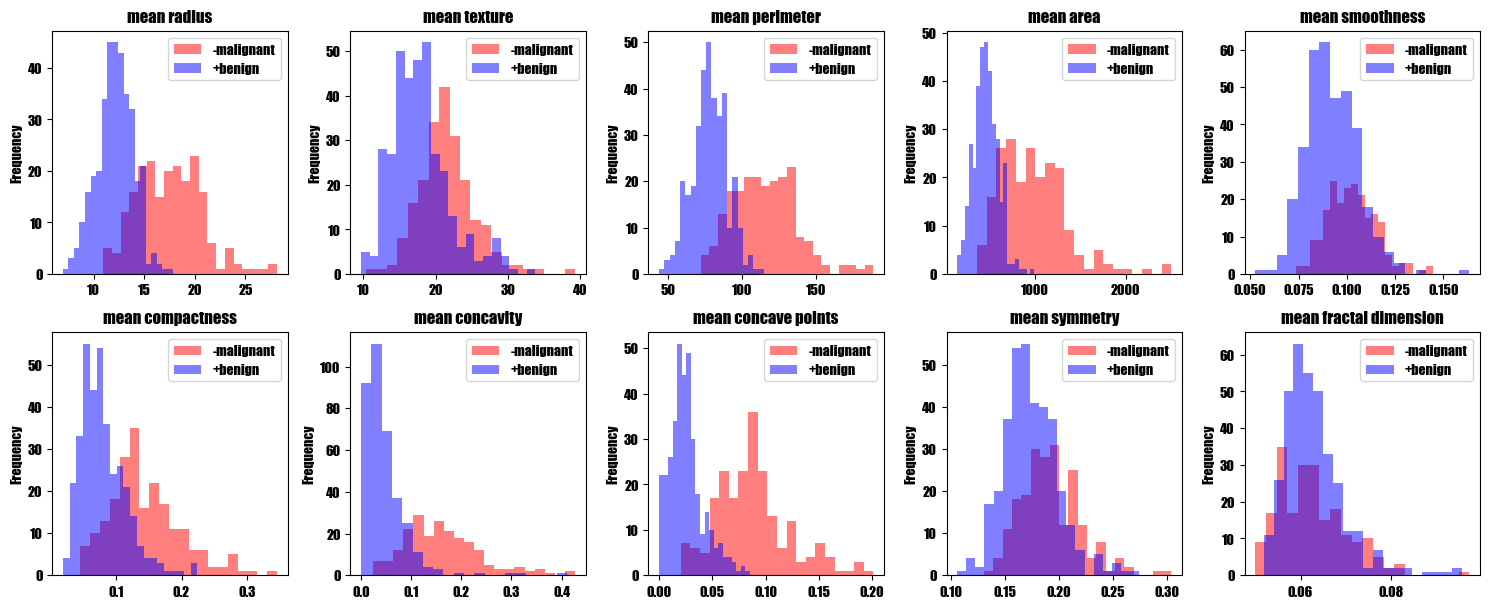

In [202]:
cancer_data['class'] = cancer_dataset.target_names[cancer_dataset.target]

malignant_data = cancer_data[cancer_data['class'] == 'malignant']
benign_data = cancer_data[cancer_data['class'] == 'benign']

attributes = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']

plt.figure(figsize=(15, 15))
for i, attribute in enumerate(attributes):
    plt.subplot(5, 5, i + 1)
    plt.hist(malignant_data[attribute], bins=20, alpha=0.5, label='-malignant', color='red')
    plt.hist(benign_data[attribute], bins=20, alpha=0.5, label='+benign', color='blue')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'{attribute}')
plt.tight_layout()
plt.show()

<h5> 4. Постройте модель по методу k - ближайших средних </h5>

In [203]:
from sklearn.neighbors import KNeighborsClassifier

In [204]:
knn3_1 = KNeighborsClassifier(n_neighbors=2)
knn3_2 = KNeighborsClassifier(n_neighbors=3)
knn3_1.fit(X_train3, y_train3)
knn3_2.fit(X_train3, y_train3)

KNeighborsClassifier(n_neighbors=3)

<h5> 5. Получите прогноз модели </h5>

In [205]:
y_pred3 = knn3_1.predict(X_test3)
print("Prediction for test set: \n{}".format(y_pred3))

Prediction for test set: 
[0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0
 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1]


<h5> 6. Оцените качество модели </h5>

In [206]:
print("Correctness on the test set: {:.3f}".format(np.mean(y_pred3 == y_test3)))
print("____________________________________")
print("Correctness on the test set: {:.3f}".format(knn3_1.score(X_test3, y_test3)))
print("Correctness on the test set: {:.3f}".format(knn3_2.score(X_test3, y_test3)))
print("____________________________________")
print("Correctness on the train set: {:.3f}".format(knn3_1.score(X_train3, y_train3)))
print("Correctness on the train set: {:.3f}".format(knn3_2.score(X_train3, y_train3)))

Correctness on the test set: 0.901
____________________________________
Correctness on the test set: 0.901
Correctness on the test set: 0.918
____________________________________
Correctness on the train set: 0.962
Correctness on the train set: 0.952


<h5>Вывод</h5>

Данный набор данных представляет собой информацию о характеристиках клеток рака груди, которая может использоваться для диагностики и классификации опухолей как злокачественных и доброкачествных на основе их признаков.

Было всего 569 экземпляров и 30 прогнозов со статическими данными. 

Основные этапы анализа данных включали в себя загрузку, визуализацию и предварительную обработку данных для обучения моделей машинного обучения. 

В ходе работы построила гистограммы для каждого атрибута в разбивке по классам (злокачественный и доброкачественный) с использованием 10 атрибутов. Визуализации и статистический анализ помогли лучше понять распределение и взаимосвязи признаков в наборе данных.

Для задачи классификации опухолей был выбран алгоритм k-ближайших соседей, с количеством соседей 1 и 4, и модели были обучены на обучающем - 70% и тестовом наборах данных - 30%. Выбор разного количества соседей помогает лучше понять метод, который мы использовали,
 k-ближайших соседей. 
 
Результаты обучения и тестирования моделей показали высокую способность выше 90% точности классификации, что свидетельствует о потенциале использования машинного обучения в диагностике рака груди. Это может быть важным инструментом для медицины.

Исследование набора данных "Набор данных по раку груди висконсин (диагностический)" подчеркивает важность применения современных методов машинного обучения в медицине, и надеюсь, что это может способствовать более успешной борьбе с раковыми заболеваниями и улучшению диагностики в медицинской практике.